In [11]:
import sys
import warnings
import random

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import mixture

In [1]:
import astrobf

In [2]:
from astrobf import tGMM

In [8]:
from astrobf.tGMM import truncated_em, likelihood_estimation, moments_estimation, parameters_initialization

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]


********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM
	Iteration #0 	 ** Log-likelihood: -361643.0760169645
	Iteration #10 	 ** Log-likelihood: -354797.5427550044
	Iteration #20 	 ** Log-likelihood: -354790.3517571679
	Iteration #30 	 ** Log-likelihood: -354792.0955266652
	Iteration #40 	 ** Log-likelihood: -354792.75623728934
Estimated parameters by standard EM:
pp: 
[ 0.3093966   0.44356801  0.24703539]

mu: 
[[

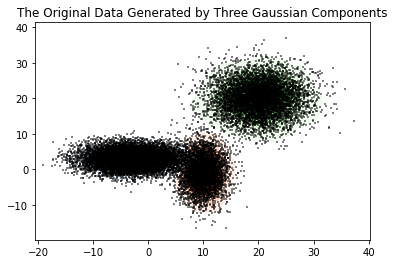

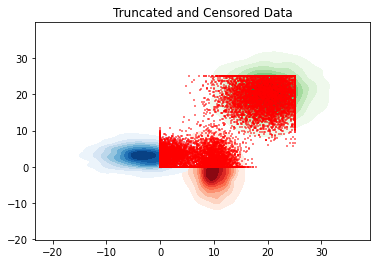

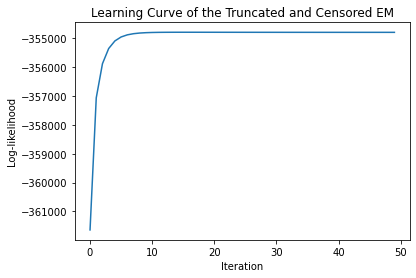

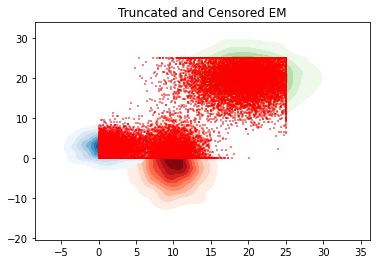

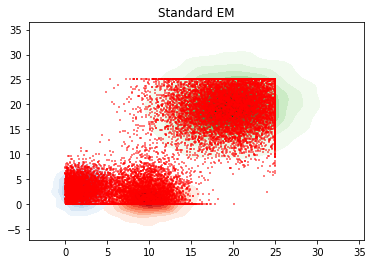

In [20]:
import sys
import warnings

import numpy as np

from astrobf.tGMM.experiments import perform_bivariate_3_gaussians_exp

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

def main(argv):
    # Number of data points
    N = 100000

    # Define the true values of mixture weights
    pp = np.array([0.5, 0.2, 0.3])

    # Define Gaussian components
    mu_1 = np.array([-3., 3.])
    mu_2 = np.array([10., -1.])
    mu_3 = np.array([20., 20.])
    sigma_1 = np.diag([20., 5.])
    sigma_2 = np.diag([5., 20.])
    sigma_3 = np.diag([20., 20.])

    # Define the truncation and censoring bounds
    truncation_bounds = np.array([0.1, np.inf])
    censoring_bounds = np.array([[0], [np.inf]])

    # Start the experiment 
    perform_bivariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3,
                                      truncation_bounds, censoring_bounds)

if __name__ == "__main__":
    main(sys.argv)


Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]


********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM
	Iteration #0 	 ** Log-likelihood: -355440.6844538341
	Iteration #10 	 ** Log-likelihood: -347560.5163768201
	Iteration #20 	 ** Log-likelihood: -347554.21331174596
	Iteration #30 	 ** Log-likelihood: -347555.80208320735
	Iteration #40 	 ** Log-likelihood: -347556.3799535828
Estimated parameters by standard EM:
pp: 
[ 0.30829979  0.44497025  0.24672996]

mu: 
[

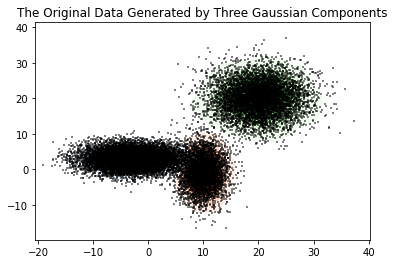

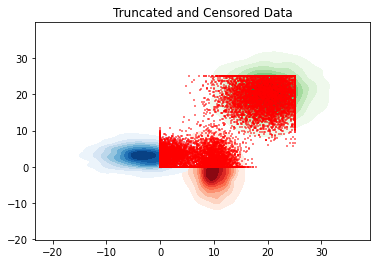

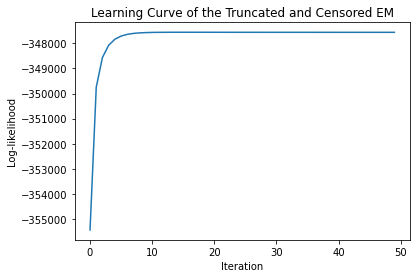

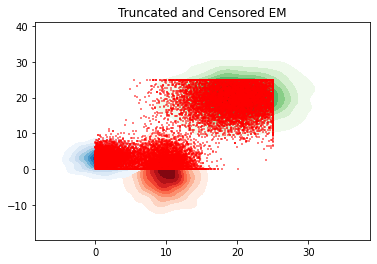

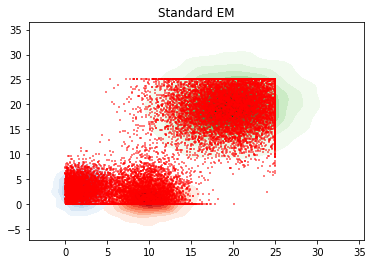

In [21]:
def main(argv):
    # Number of data points
    N = 100000

    # Define the true values of mixture weights
    pp = np.array([0.5, 0.2, 0.3])

    # Define Gaussian components
    mu_1 = np.array([-3., 3.])
    mu_2 = np.array([10., -1.])
    mu_3 = np.array([20., 20.])
    sigma_1 = np.diag([20., 5.])
    sigma_2 = np.diag([5., 20.])
    sigma_3 = np.diag([20., 20.])

    # Define the truncation and censoring bounds
    truncation_bounds = np.array([0.1, np.inf])
    censoring_bounds = np.array([[0], [25]])

    # Start the experiment 
    perform_bivariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3,
                                      truncation_bounds, censoring_bounds)

if __name__ == "__main__":
    main(sys.argv)

In [12]:
seed = 123
N = 100000

# Define the true values of mixture weights
pp = np.array([0.5, 0.2, 0.3])

# Define Gaussian components
mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])

# Define the truncation and censoring bounds
truncation_bounds = np.array([0, np.inf])
censoring_bounds = np.array([[0], [25]])

In [10]:
# Fix the random state
random.seed(seed)
np.random.seed(seed)

# Stack and reorder the means and covariance matrices into unified matrices
mu = np.stack([mu_1, mu_2, mu_3], axis=0)
sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
K = mu.shape[0]

# Generate GMM data
print("Step #1: Generating a Gaussian-Mixture-Model dataset")
print("True parameters:")
print("pp: \n{}\n".format(pp))
print("mu: \n{}\n".format(mu))
print("sigma: \n{}\n".format(sigma.T))
y = generate_gmm_data(pp, mu, sigma, N)

# Plot the GMM data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='black')
plt.title("The Original Data Generated by Three Gaussian Components")
print("\n" + "*"*80)

# Perform censoring and truncation on the original data
print("Step #2: Censoring and truncating the data")
x = censor_and_truncate_data(y)

# Plot the censored and truncated data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='red')
plt.title("Truncated and Censored Data")
print("\n" + "*"*80)

# Init parameters using K-means
print("Step #3: Initializing parameters using K-means")
par = init_kmeans(x, K)
print("\n" + "*"*80)

NameError: name 'random' is not defined

In [ ]:
tc_em_results = perform_truncated_em(x, K, 
                                     truncation_bounds, censoring_bounds, 
                                     par['pp'], par['mu'], par['sigma'], 
                                     max_iteration)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(tc_em_results['pp']))
print("mu: \n{}\n".format(tc_em_results['mu']))
print("sigma: \n{}\n".format(tc_em_results['sigma'].T))

plt.figure()
plt.plot(range(len(tc_em_results['ll_hist'])), tc_em_results['ll_hist'])
plt.title("Learning Curve of the Truncated and Censored EM")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")

plt.figure()
ax = plot_gmm_data(x, tc_em_results['mu'], tc_em_results['sigma'])
plt.title("Truncated and Censored EM")
print("\n" + "*"*80)

print("Step #5: Estimating parameters using standard EM")
std_em_results = perform_standard_em(x, K, seed)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(std_em_results['pp']))
print("mu: \n{}\n".format(std_em_results['mu']))
print("sigma: \n{}\n".format(std_em_results['sigma'].T))

plt.figure()
ax = plot_gmm_data(x, std_em_results['mu'], std_em_results['sigma'])
plt.title("Standard EM")
print("\n" + "*"*80)

# Evaluate the KL-Divergence between true distribution and estimated 
# distributions
print("Step #6: Evaluating the estimated parameters")
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
tc_em_results['pp'], tc_em_results['mu'], tc_em_results['sigma'] =\
    reorder_gmm_compoments(tc_em_results['pp'], tc_em_results['mu'],
                           tc_em_results['sigma'])
std_em_results['pp'], std_em_results['mu'], std_em_results['sigma'] =\
    reorder_gmm_compoments(std_em_results['pp'], std_em_results['mu'],
                           std_em_results['sigma'])

true_gmm = build_GMM_model(pp, mu, sigma, seed)
tc_gmm = build_GMM_model(tc_em_results['pp'], tc_em_results['mu'],
                         tc_em_results['sigma'], seed)
std_gmm = build_GMM_model(std_em_results['pp'], std_em_results['mu'],
                          std_em_results['sigma'], seed)

tc_kl = estimate_kl_divergence_gmm(true_gmm, tc_gmm)
std_kl = estimate_kl_divergence_gmm(true_gmm, std_gmm)    

print("\t* KL-Divergence corresponding to truncated and censored EM: {}".\
    format(tc_kl))
print("\t* KL-Divergence corresponding to standard EM: {}".\
    format(std_kl))
print("\n" + "*"*80)

# Show the plots
print("Step #7: Showing the plots")
plt.show()
